In [4]:
from __future__ import annotations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from carps.analysis.process_data import get_interpolated_performance_df, load_logs


def print_overview(df_trials: pd.DataFrame) -> None:
    print(df_trials.columns)
    print(df_trials["optimizer_id"].unique())
    print(df_trials["benchmark_id"].unique())
    print(df_trials["problem_id"].unique())
    print("Number of seeds", df_trials["seed"].nunique())


rundir = "/home/numina/Documents/repos/CARP-S-Experiments/lib/CARP-S/runs"

df, df_cfg = load_logs(rundir=rundir)
print_overview(df)
perf = get_interpolated_performance_df(df)
perf_time = get_interpolated_performance_df(df, x_column="time_norm")

[12:09:25] INFO     Load logs from                                                               ]8;id=422889;file:///home/numina/Documents/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/process_data.py\process_data.py]8;;\:]8;id=265596;file:///home/numina/Documents/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/process_data.py#94\94]8;;\
                    `/home/numina/Documents/repos/CARP-S-Experiments/lib/CARP-S/runs/logs.csv`                     
                    and associated configs from                                                                    
                    /home/numina/Documents/repos/CARP-S-Experiments/lib/CARP-S/runs/logs_cfg.csv                   
                    . Preprocess logs.                                                                             

/home/numina/Documents/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/process_data.py:100: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(logs_fn)


           INFO     Processing raw logs. Normalize n_trials and costs. Calculate trajectory      ]8;id=353664;file:///home/numina/Documents/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/process_data.py\process_data.py]8;;\:]8;id=553511;file:///home/numina/Documents/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/process_data.py#15\15]8;;\
                    (incumbent cost).                                                                              

Index(['n_trials', 'trial_info__config', 'trial_info__instance',
       'trial_info__seed', 'trial_info__budget', 'trial_value__cost',
       'trial_value__time', 'trial_value__virtual_time', 'trial_value__status',
       'trial_value__starttime', 'trial_value__endtime', 'seed',
       'benchmark_id', 'problem_id', 'optimizer_id', 'problem.bench',
       'problem.instance', 'problem.budget_type', 'problem.metric',
       'trial_info__name', 'trial_info__checkpoint', 'experiment_id',
       'n_trials_norm', 'trial_value__cost_norm', 'trial_value__cost_inc',
       'trial_value__cost_inc_norm', 'time', 'time_norm'],
      dtype='object')
['HEBO' 'RandomSearch' 'SMAC3-BlackBoxFacade']
['YAHPO']
['yahpo/so/lcbench/167168/None' 'yahpo/so/lcbench/189873/None'
 'yahpo/so/lcbench/189906/None' 'yahpo/so/nb301/CIFAR10/None'
 'yahpo/so/rbv2_glmnet/375/None' 'yahpo/so/rbv2_glmnet/458/None'
 'yahpo/so/rbv2_ranger/16/None' 'yahpo/so/rbv2_ranger/42/None'
 'yahpo/so/rbv2_rpart/14/None' 'yahpo/so/rbv2_

[12:09:26] INFO     Create dataframe for neat plotting by aligning x-axis / interpolating        ]8;id=238970;file:///home/numina/Documents/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/process_data.py\process_data.py]8;;\:]8;id=689508;file:///home/numina/Documents/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/process_data.py#64\64]8;;\
                    budget.                                                                                        

[12:09:27] INFO     Create dataframe for neat plotting by aligning x-axis / interpolating        ]8;id=826312;file:///home/numina/Documents/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/process_data.py\process_data.py]8;;\:]8;id=862521;file:///home/numina/Documents/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/process_data.py#64\64]8;;\
                    budget.                                                                                        

In [2]:
from carps.analysis.interval_estimates import plot_interval_estimates

# fig, axes = plot_interval_estimates(performance_data=perf, load_from_pickle=False, figure_filename="figures/plot_interval_estimates.pdf")

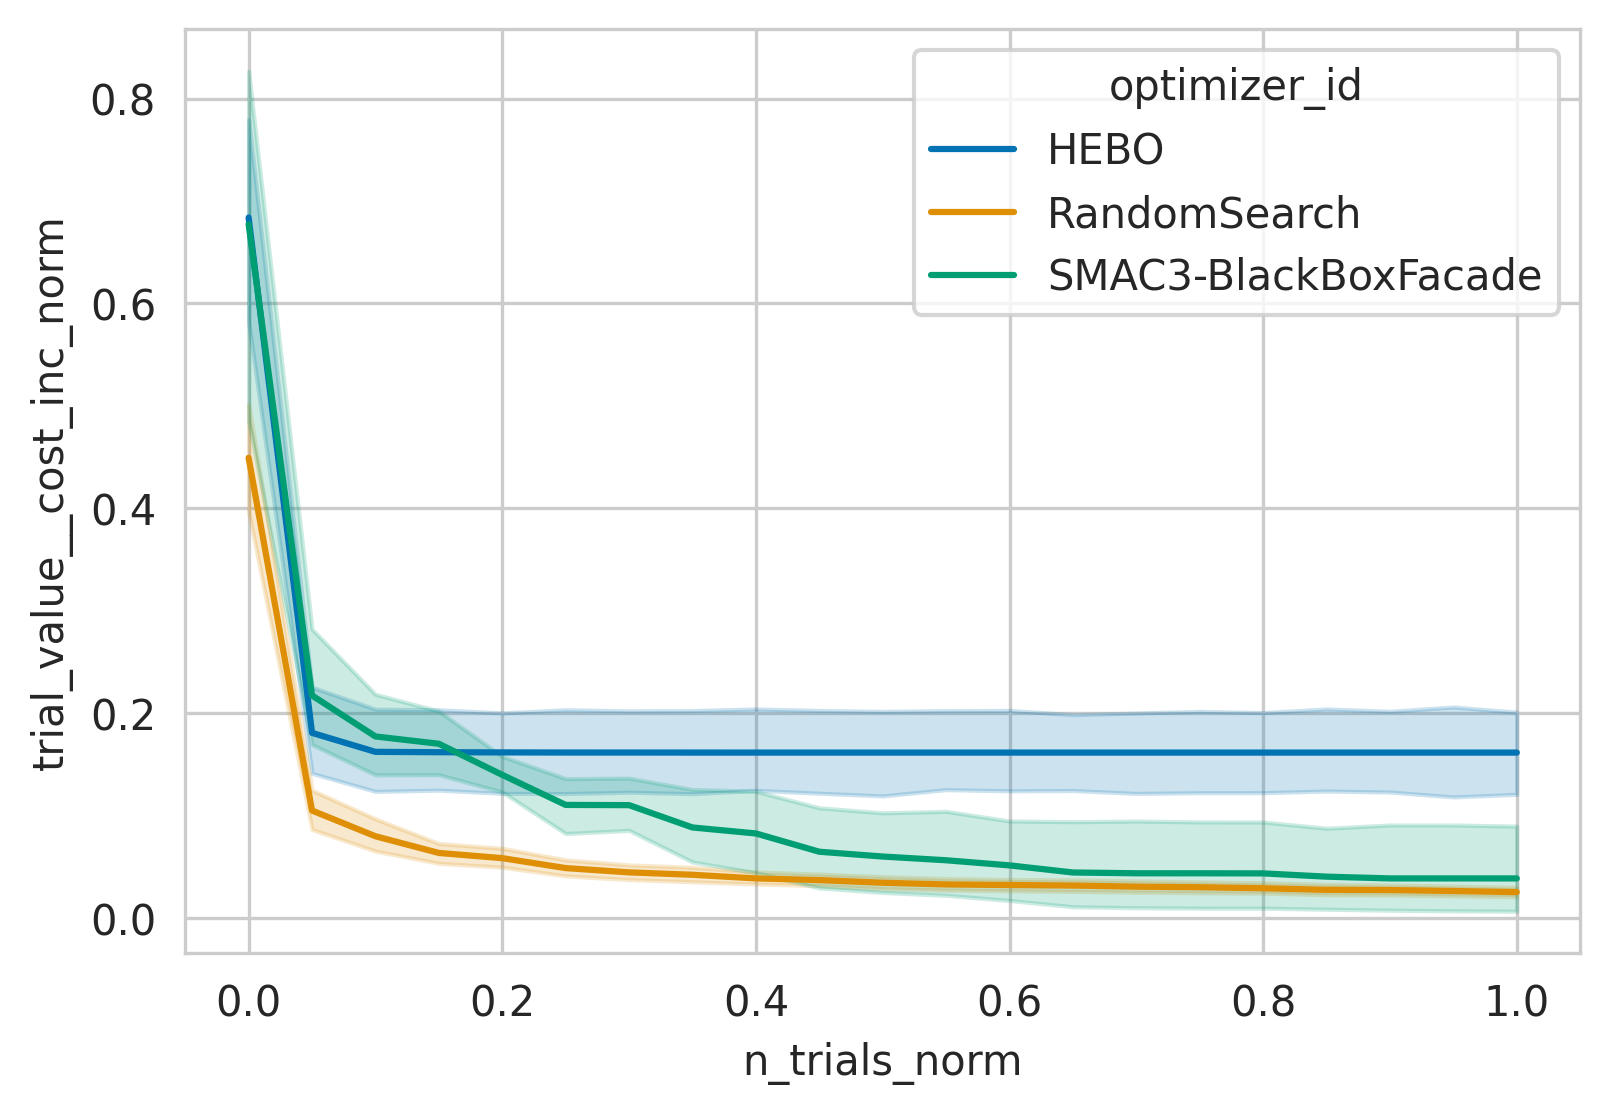

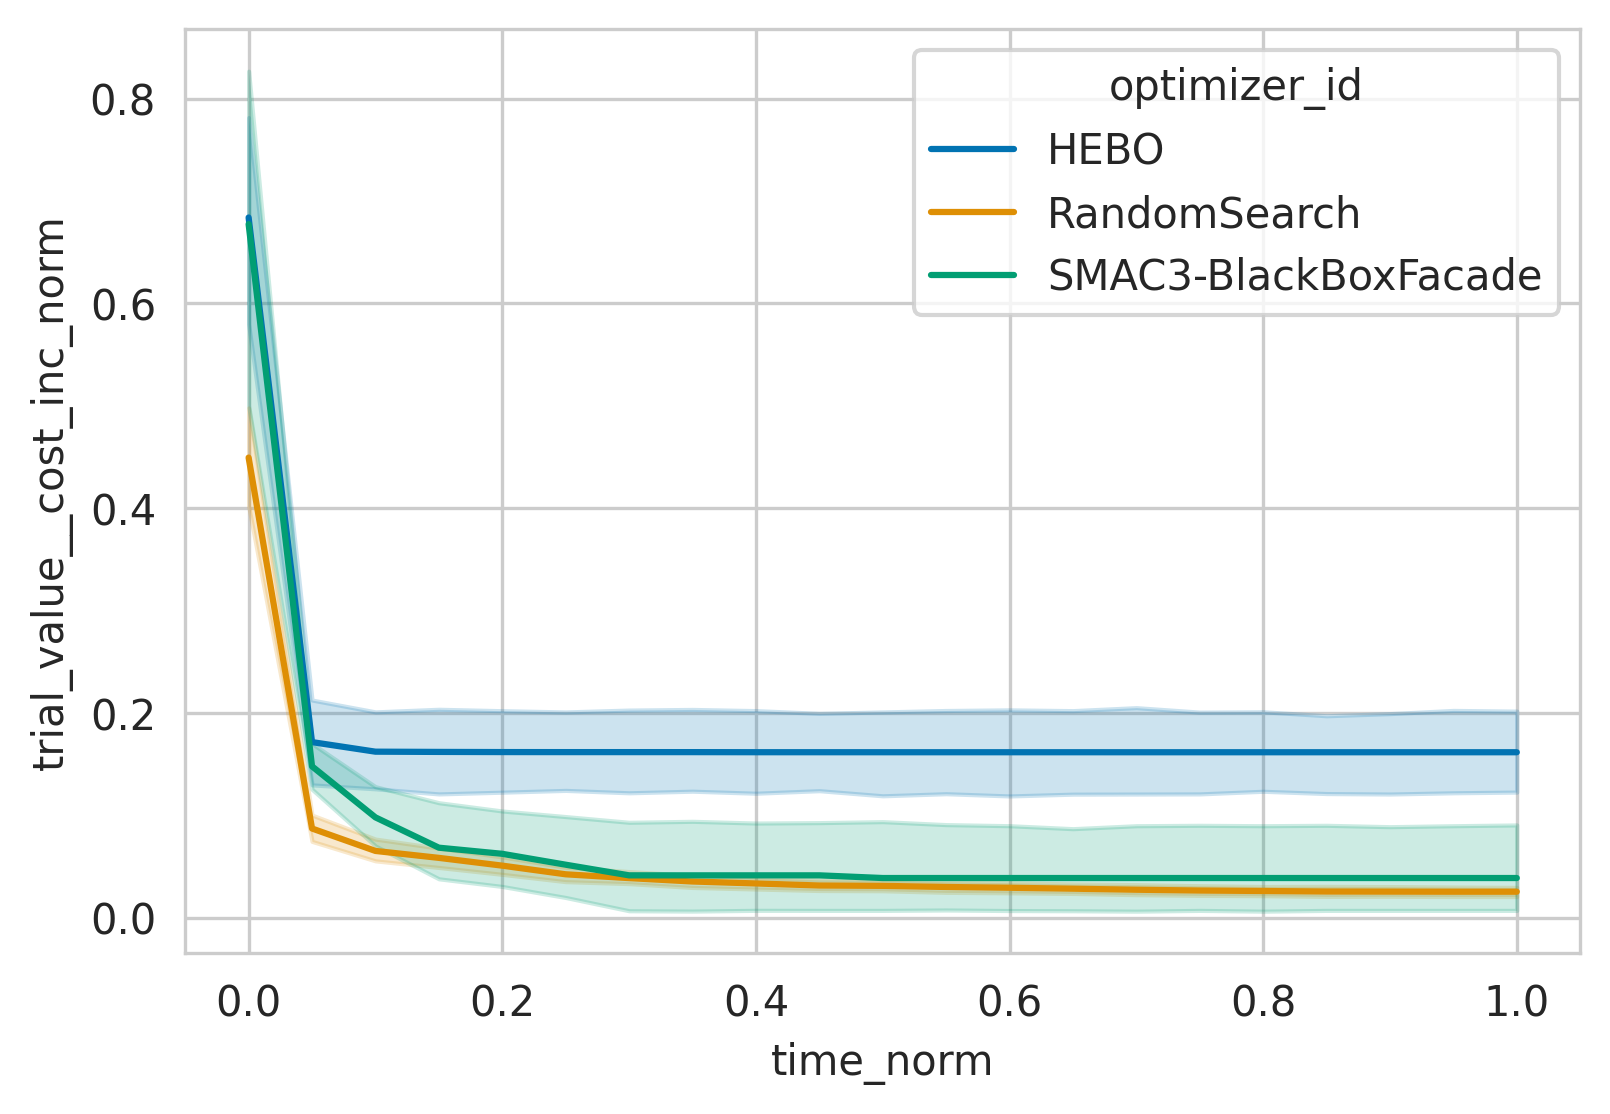

In [5]:
from carps.analysis.performance_over_time import plot_performance_over_time
lineplot_kwargs = dict()
fig, ax = plot_performance_over_time(df=perf, x="n_trials_norm", y="trial_value__cost_inc_norm", hue="optimizer_id", figure_filename="figures/performance_over_time_trials.pdf", figsize=(6,4), **lineplot_kwargs)
fig, ax = plot_performance_over_time(df=perf_time, x="time_norm", y="trial_value__cost_inc_norm", hue="optimizer_id", figure_filename="figures/performance_over_time_elapsed.pdf", figsize=(6,4), **lineplot_kwargs)

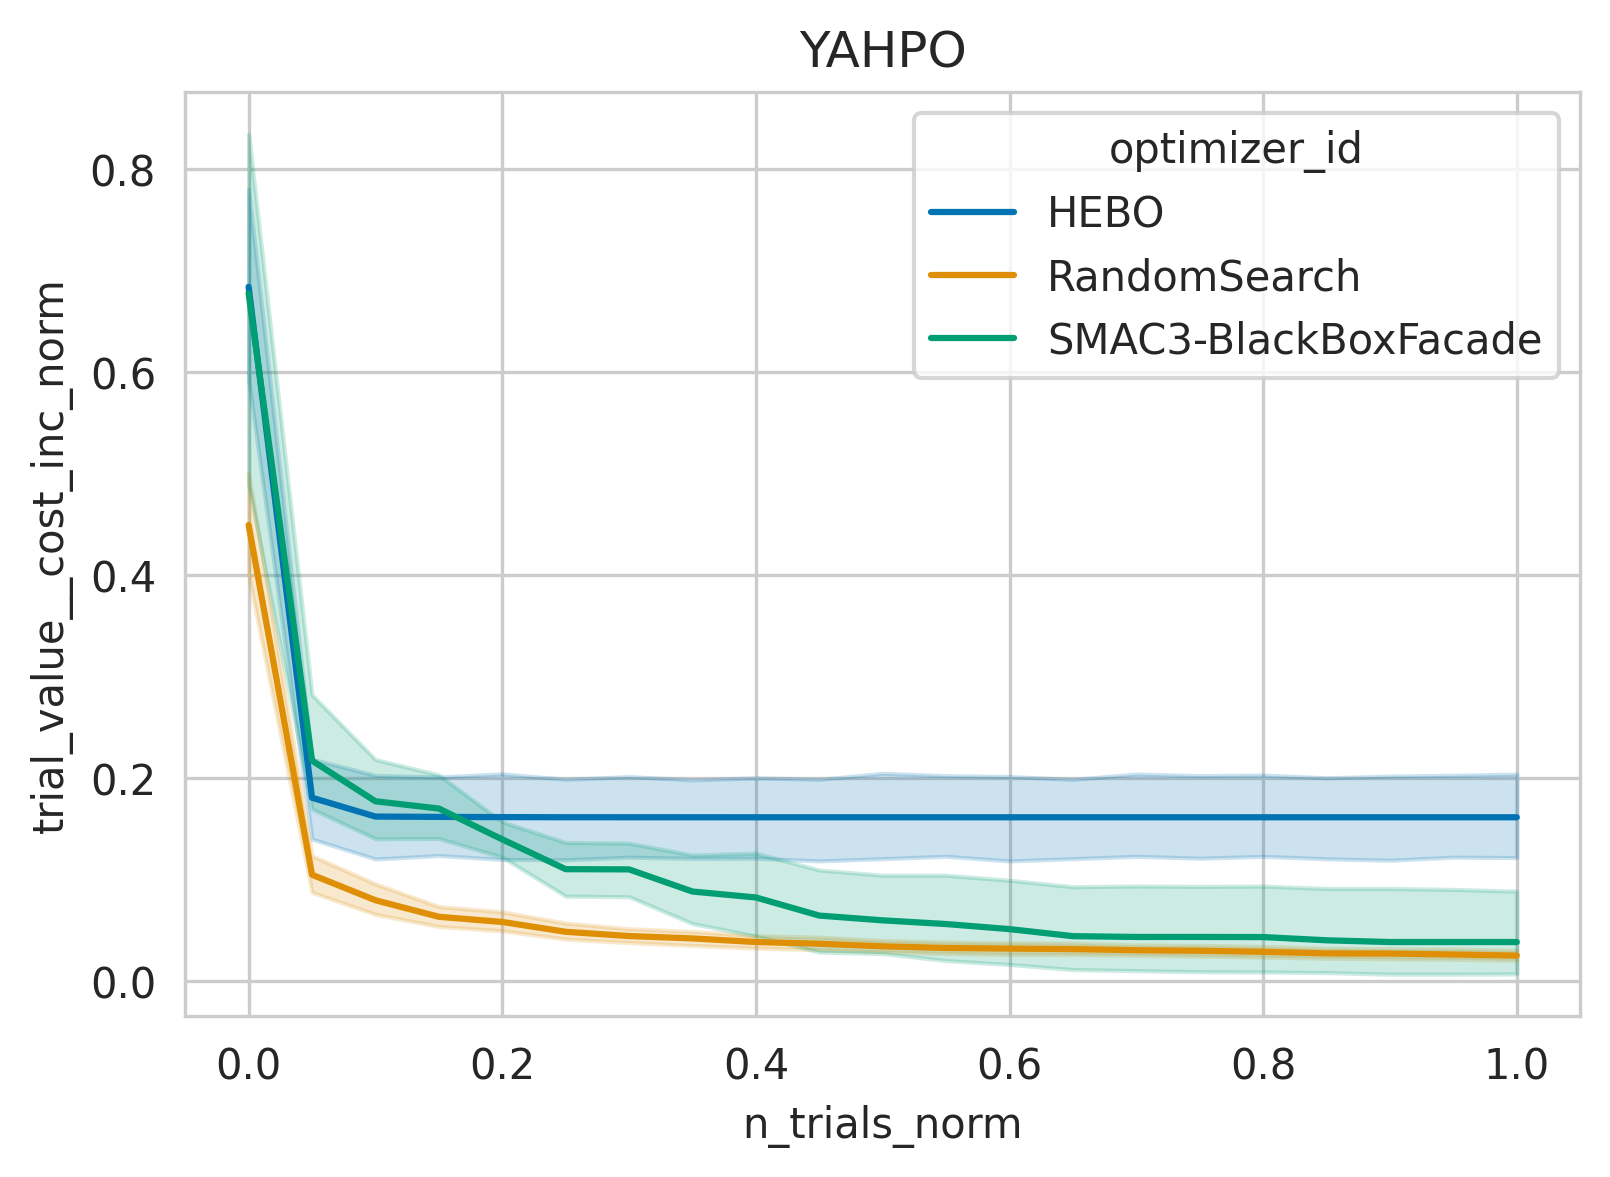

ValueError: Could not interpret value `n_trials_norm` for `x`. An entry with this name does not appear in `data`.

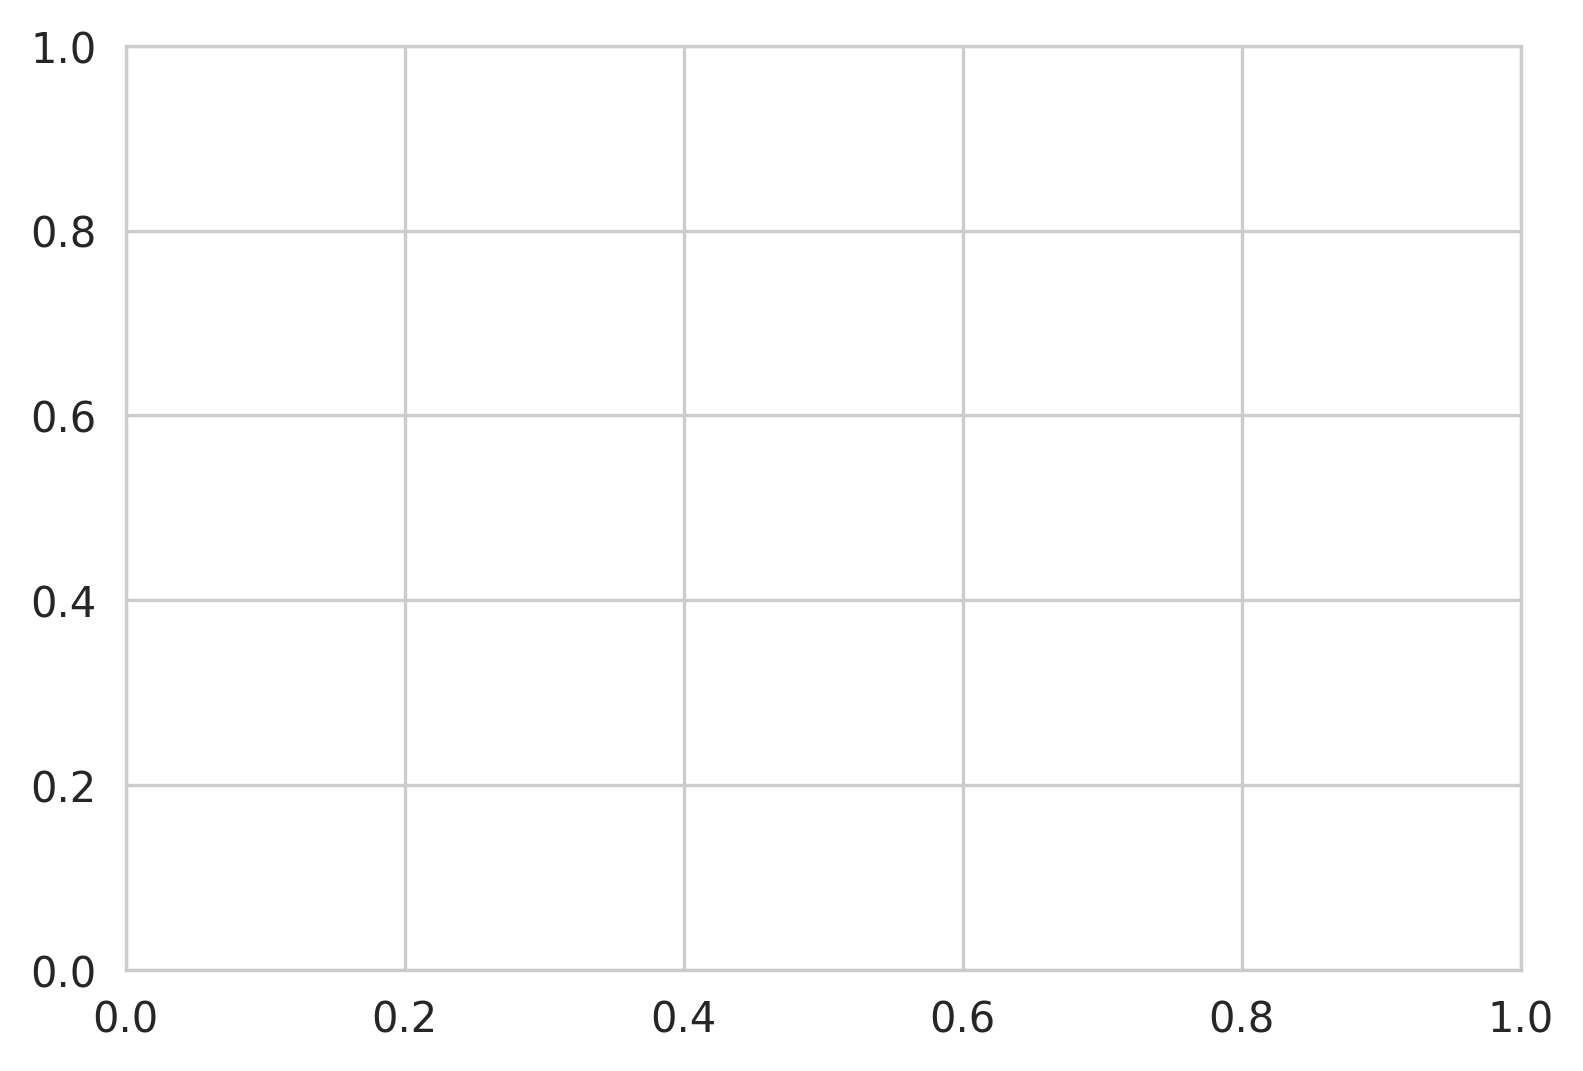

In [6]:
# Plot per benchmark
from carps.analysis.utils import get_color_palette, savefig
from carps.analysis.performance_over_time import plot_performance_over_time

palette = get_color_palette(perf)
lineplot_kwargs = dict()

# Iterations
for gid, gdf in perf.groupby(by="benchmark_id"):    
    figure_filename = f"figures/performance_over_time_trials_{gid}.pdf"
    fig, ax = plot_performance_over_time(df=gdf, x="n_trials_norm", y="trial_value__cost_inc_norm", hue="optimizer_id", figure_filename=figure_filename, figsize=(6,4), **lineplot_kwargs)
    ax.set_title(gid)
    savefig(fig, figure_filename)
    plt.show()

# Elapsed time
for gid, gdf in perf_time.groupby(by="benchmark_id"):    
    figure_filename = f"figures/performance_over_time_elapsed_{gid}.pdf"
    fig, ax = plot_performance_over_time(df=gdf, x="time_norm", y="trial_value__cost_inc_norm", hue="optimizer_id", figure_filename=figure_filename, figsize=(6,4), **lineplot_kwargs)
    ax.set_title(gid)
    savefig(fig, figure_filename)
    plt.show()

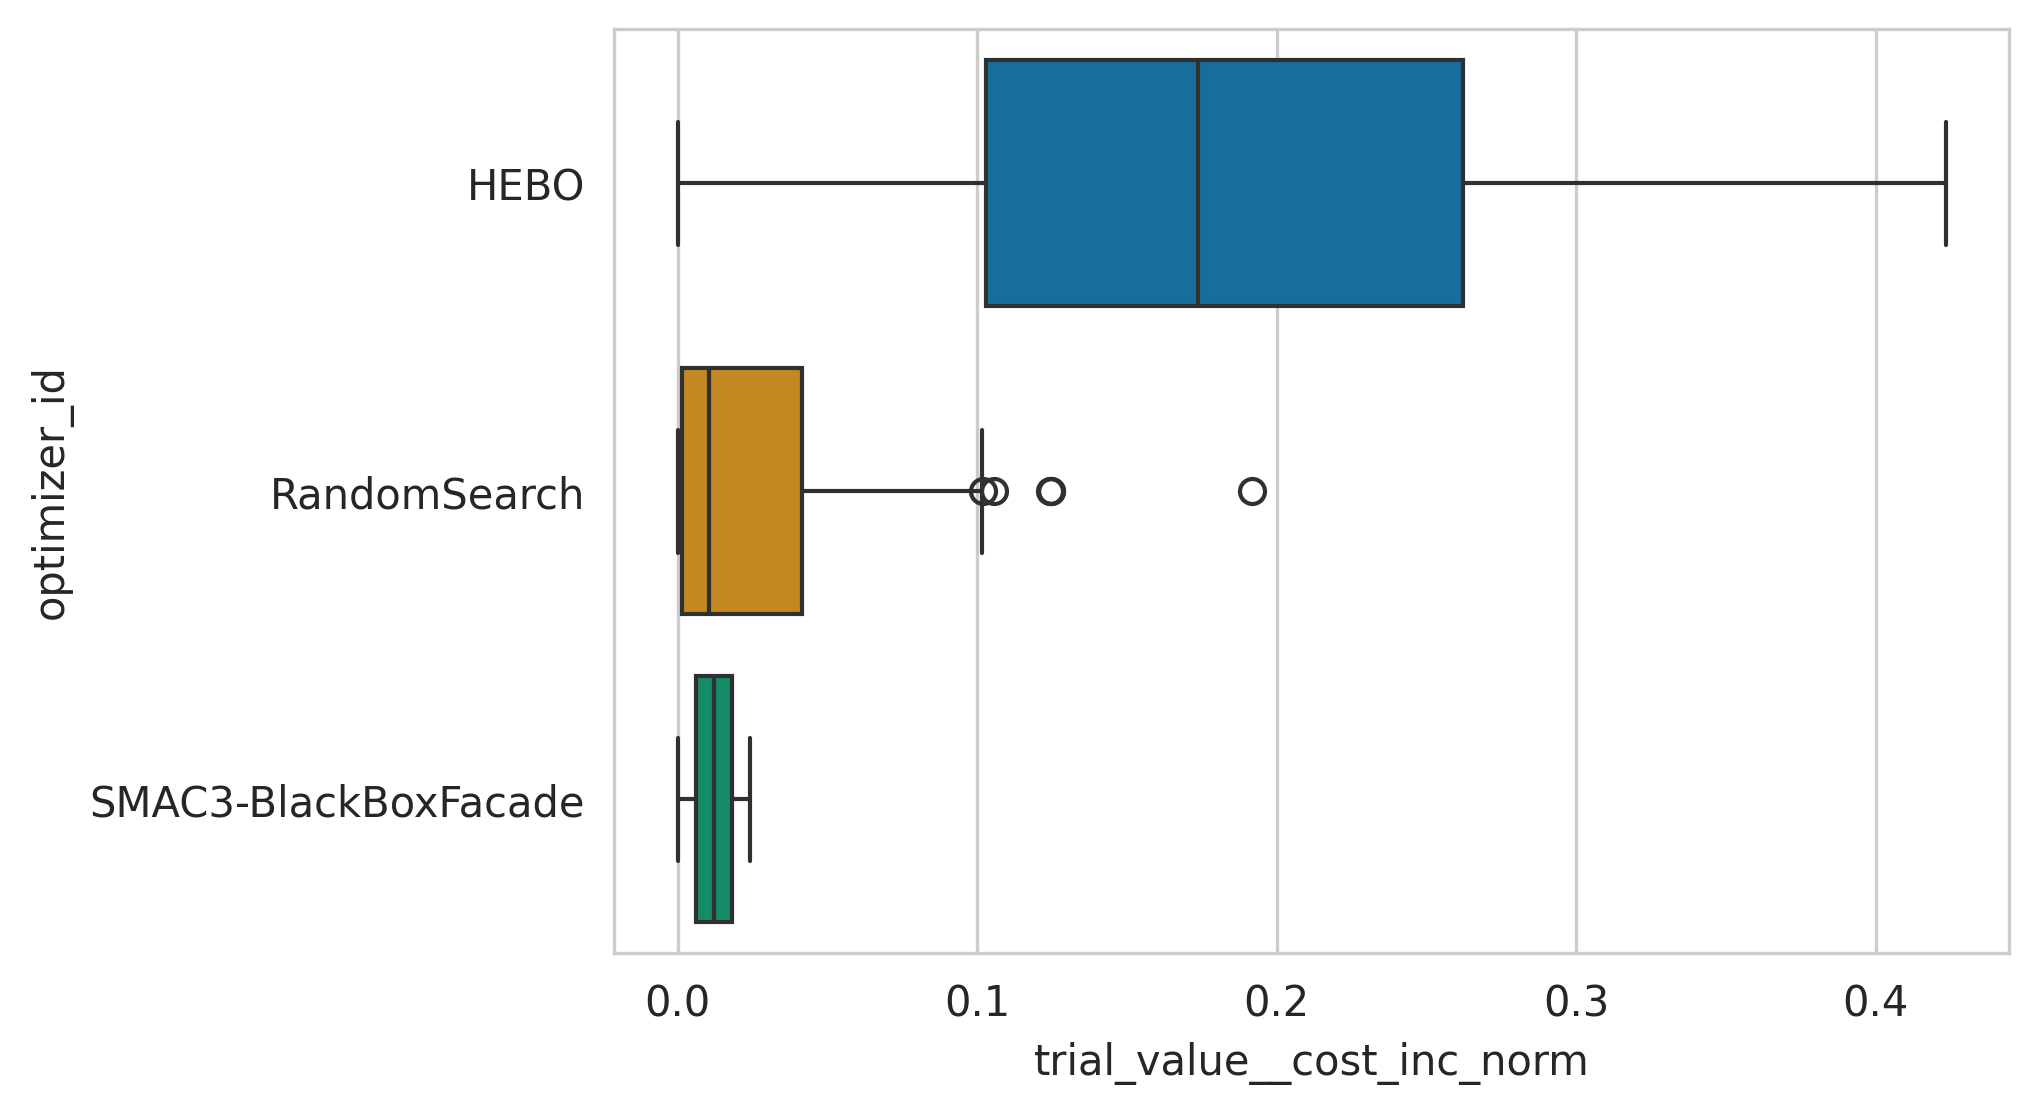

In [5]:
from carps.analysis.final_performance import plot_final_performance_boxplot

boxplot_kwargs = dict()
fig, ax = plot_final_performance_boxplot(df=perf, x="trial_value__cost_inc_norm", y="optimizer_id", hue="optimizer_id", figure_filename="figures/final_performance_boxplot.pdf", figsize=(6,4), **boxplot_kwargs)

In [6]:
max_val = df["n_trials_norm"].max()
error = df.groupby(by=["benchmark_id", "problem_id", "optimizer_id", "seed"])["n_trials_norm"].apply(lambda x: not np.isclose(x.max(), max_val))
error = error[error]
for i in error.index:
    print(i)

('YAHPO', 'yahpo/so/lcbench/167168/None', 'HEBO', 1)
('YAHPO', 'yahpo/so/lcbench/167168/None', 'HEBO', 2)
('YAHPO', 'yahpo/so/lcbench/167168/None', 'HEBO', 3)
('YAHPO', 'yahpo/so/lcbench/167168/None', 'HEBO', 4)
('YAHPO', 'yahpo/so/lcbench/167168/None', 'HEBO', 5)
('YAHPO', 'yahpo/so/lcbench/167168/None', 'HEBO', 6)
('YAHPO', 'yahpo/so/lcbench/167168/None', 'HEBO', 7)
('YAHPO', 'yahpo/so/lcbench/167168/None', 'HEBO', 8)
('YAHPO', 'yahpo/so/lcbench/167168/None', 'HEBO', 9)
('YAHPO', 'yahpo/so/lcbench/167168/None', 'HEBO', 10)
('YAHPO', 'yahpo/so/lcbench/167168/None', 'SMAC3-BlackBoxFacade', 2)
('YAHPO', 'yahpo/so/lcbench/189873/None', 'HEBO', 1)
('YAHPO', 'yahpo/so/lcbench/189873/None', 'HEBO', 2)
('YAHPO', 'yahpo/so/lcbench/189873/None', 'HEBO', 3)
('YAHPO', 'yahpo/so/lcbench/189873/None', 'HEBO', 4)
('YAHPO', 'yahpo/so/lcbench/189873/None', 'HEBO', 5)
('YAHPO', 'yahpo/so/lcbench/189873/None', 'HEBO', 6)
('YAHPO', 'yahpo/so/lcbench/189873/None', 'HEBO', 7)
('YAHPO', 'yahpo/so/lcbench/1